In [326]:
import numpy as np
import matplotlib.pyplot as plt

#### 0. Initialize

In [327]:
N = 20
x = np.random.rand(N,2)

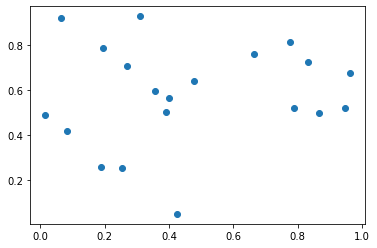

In [328]:
plt.scatter(x[:,0],x[:,1])

In [329]:
def sort_points(x: list[list], x0: list):
    """ Sort points by distance to a seed point x0, by the second order euclidean dist |xi - x0|**2"""
    return sorted(x, key=lambda xi: np.linalg.norm(xi-x0,2))

In [330]:
def circle_center(A,B,C) -> list[float]:
    D = 2*(A[0]*(B[1]-C[1]) + B[0]*(C[1]-A[1]) + C[0]*(A[1]-B[1]))
    Ux = (A[0]**2+A[1]**2)*(B[1]-C[1])+(B[0]**2+B[1]**2)*(C[1]-A[1])+(C[0]**2+C[1]**2)*(A[1]-B[1])
    Uy = (A[0]**2+A[1]**2)*(C[0]-B[0])+(B[0]**2+B[1]**2)*(A[0]-C[0])+(C[0]**2+C[1]**2)*(B[0]-A[0])
    return np.array([Ux/D,Uy/D])

In [331]:
def angle(point: list[float], center: list[float]) -> float:
    """ Returns the angle in degrees between a point and a center"""
    return (np.arctan2(point[1]-center[1], point[0]-center[0]) * 180/np.pi + 360) % 360

#### 1. Select a seed point

In [332]:
x0 = x[0]
x = np.delete(x,0,0)

#### 2. Sort accoring to |xi - x0|^2

In [333]:
# Find the closest point to x0
x = sort_points(x,x0)

#### 3. Find the point xj cloests to x0

In [334]:
# closest point
xj = x[0]
x = np.delete(x,0,0)

#### 4. Find the point xk that creates the smallest circum-circle with x0 and xj and record the cetner of the circum-circle C

In [335]:
# Running variables
A_min = np.Infinity
A_min_index = None

# Loop through all points
for i, xk in enumerate(x):
    a = np.linalg.norm(xk - x0)
    b = np.linalg.norm(x0 - xj)
    c = np.linalg.norm(xj - x0)
    s = (a+b+c) * 0.5
    A = (np.pi * 0.25) * s**2
    if A < A_min:
        A_min = A
        A_min_index = i


# Update x and declare xk and C
xk = x[A_min_index]
x = np.delete(x, A_min_index, 0)
C = circle_center(x0,xj,xk)

#### 4.1 Visualize / check everything is working

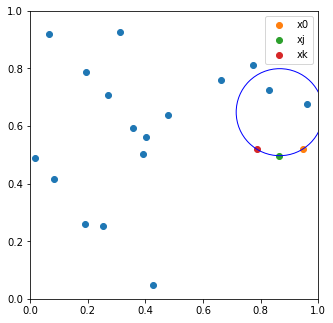

In [336]:
plt.figure(figsize=[5, 5])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[x0[0]],y=[x0[1]],label="x0")
plt.scatter(x=[xj[0]],y=[xj[1]],label="xj")
plt.scatter(x=[xk[0]],y=[xk[1]],label="xk")
plt.legend()

points_whole_ax = 5 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')


#### 5. Order points [x0, xj, xk] to give a right handed system: this is the initial seed convex hull

In [337]:
triangles = []
t = sorted([x0,xk,xj], key=lambda x: angle(x,C))
triangles.append(t)

#### 6. Resort the remaining points according to |xi - C|^2 to give points si

In [338]:
# Find the closest point to C
si = sort_points(x,C)

#### 7. Sequentially add the points si to the propogating 2D convex hull that is seeded with the triangle formed from [x0, xj, xk]. As a new point is added the faces of the 2D-that are visible to it form a a new triangles

[array([0.78847662, 0.51852247]), array([0.86481925, 0.49693252]), array([0.94561076, 0.5194103 ])]
[258.51333699696613, 278.5778209895873, 299.2664264814895]


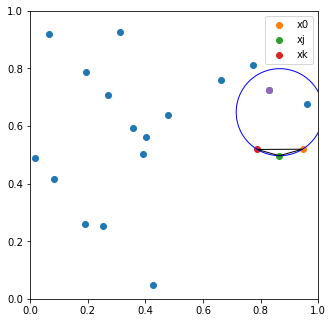

In [339]:
plt.figure(figsize=[5, 5])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[x0[0]],y=[x0[1]],label="x0")
plt.scatter(x=[xj[0]],y=[xj[1]],label="xj")
plt.scatter(x=[xk[0]],y=[xk[1]],label="xk")
plt.legend()

points_whole_ax = 5 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')
t1 = plt.Polygon(triangles[0],fill=False)
plt.gca().add_patch(t1)

si = sort_points(x, C)

plt.scatter(x=[si[0][0]], y=[si[0][1]])

print(triangles[0])
print([angle(x,si[0]) for x in triangles[0]])

In [340]:
# https://math.stackexchange.com/a/1743061